# Quantum Teleportation Protocol

## Step 0: Import

In [24]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator

## Step 1: Entanglement

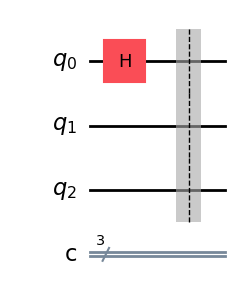

In [25]:
# create circuit with three qubits: C(0) is to be teleported, A(1) and B(2) are an entangled Bell pair

# generate circuit with three qubits and three classical bits
qc = QuantumCircuit(3, 3)

# prepare qubit C in state to be teleported 
# in this case we use Pauli X to set C = |1>
# could also use a hadamard to get |+>
qc.h(0)
qc.barrier()
qc.draw('mpl')


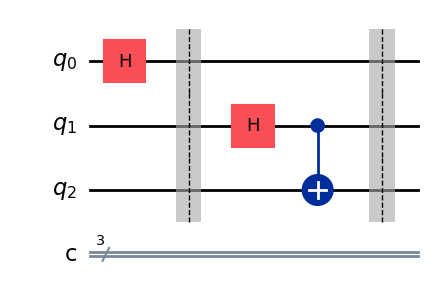

In [26]:
# entangle qubits A and B
qc.h(1)
qc.cx(1, 2)
qc.barrier()
qc.draw('mpl')


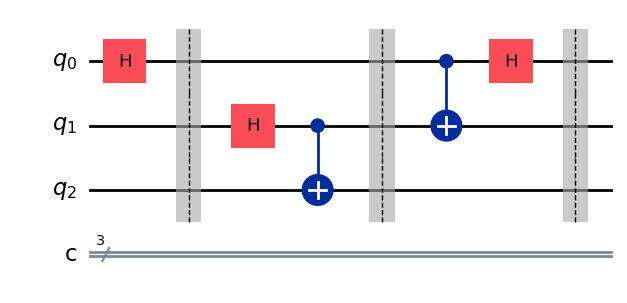

In [27]:
# Alice performs operations on her qubit and qubit C
qc.cx(0, 1)
qc.h(0)
qc.barrier()
qc.draw('mpl')


## Step 2: Bell Measurement

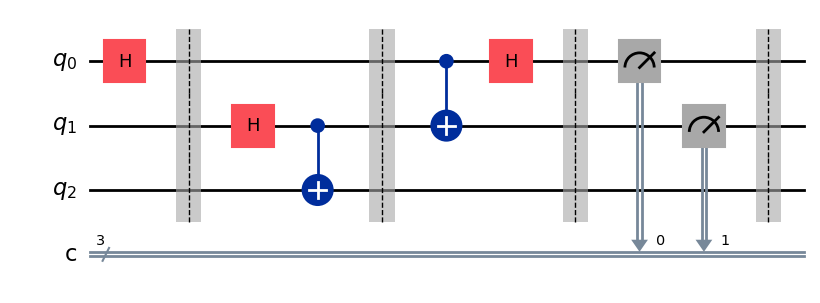

In [28]:
# Alice measures A and C
qc.measure([0,1], [0,1])
qc.barrier()
qc.draw('mpl')

## Step 3: State Reconstruction

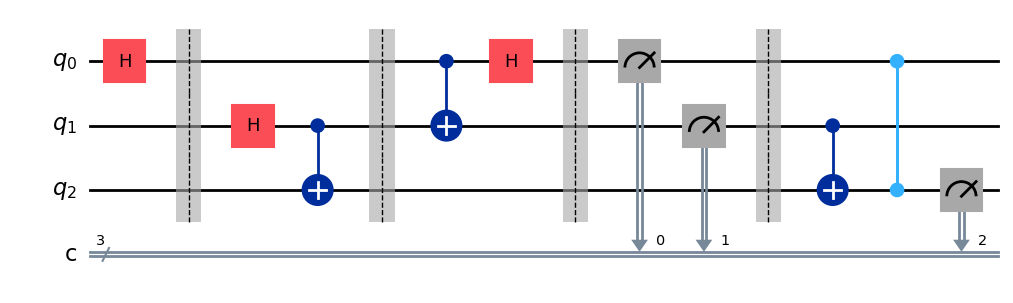

In [29]:
# Bob reconstructs the state by applying X and Z conditionally on his qubit
qc.cx(1,2)
qc.cz(0, 2)

# then he measures it
qc.measure([2], [2])
qc.draw('mpl')

## Step 4: Simulate

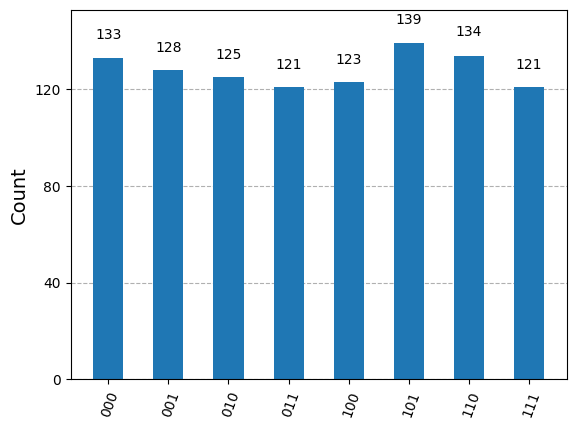

In [30]:
simulator = AerSimulator()
qc = transpile(qc, simulator)

result = simulator.run(qc).result()
counts = result.get_counts(qc)

plot_histogram(counts)